# Step 1. Load the Dataset

In [16]:
import pandas as pd

In [17]:
file_path = r"C:\Users\MUNIR SHETH\Downloads\upliance_AI\Data Analyst Intern Assignment - Excel.xlsx"

In [18]:
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

In [19]:
print("UserDetails Dataset:")
print(user_details.head())
print("\nCookingSessions Dataset:")
print(cooking_sessions.head())
print("\nOrderDetails Dataset:")
print(order_details.head())

UserDetails Dataset:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

CookingSessions Dataset:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002  

In [20]:
print("\nUserDetails Missing Values:\n", user_details.isnull().sum())
print("\nCookingSessions Missing Values:\n", cooking_sessions.isnull().sum())
print("\nOrderDetails Missing Values:\n", order_details.isnull().sum())


UserDetails Missing Values:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

CookingSessions Missing Values:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

OrderDetails Missing Values:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [21]:
duplicates = order_details.duplicated()


if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate Rows:")
    print(order_details[duplicates])
else:
    print("No duplicate rows found in OrderDetails.")

No duplicate rows found in OrderDetails.


In [22]:
duplicates = cooking_sessions.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate Rows:")
    print(order_details[duplicates])
else:
    print("No duplicate rows found in OrderDetails.") 

No duplicate rows found in OrderDetails.


In [23]:
duplicates = order_details.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate Rows:")
    print(order_details[duplicates])
else:
    print("No duplicate rows found in OrderDetails.")

No duplicate rows found in OrderDetails.


# Step 2: Data Cleaning and Inspection

In [24]:
print("UserDetails Info:")
print(user_details.info())
print("\nCookingSessions Info:")
print(cooking_sessions.info())
print("\nOrderDetails Info:")
print(order_details.info())

user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

print("\nUnique Meal Types in CookingSessions:", cooking_sessions['Meal Type'].unique())
print("\nUnique Meal Types in OrderDetails:", order_details['Meal Type'].unique())
print("\nUnique Order Statuses:", order_details['Order Status'].unique())

print("\nCleaned UserDetails Sample:")
print(user_details.head())
print("\nCleaned CookingSessions Sample:")
print(cooking_sessions.head())
print("\nCleaned OrderDetails Sample:")
print(order_details.head())

UserDetails Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes
None

CookingSessions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------        

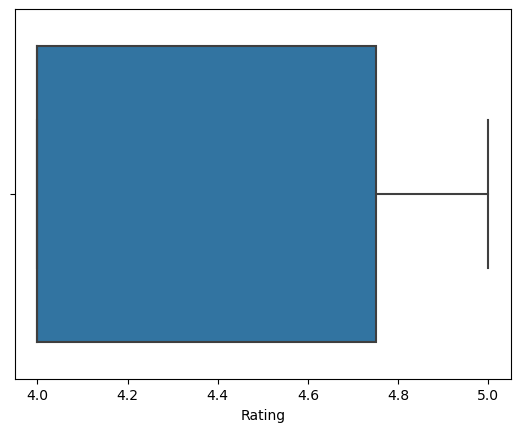

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=order_details ['Rating'])
plt.show()

In [32]:
median_rating = order_details['Rating'].median()
order_details['Rating'].fillna(median_rating, inplace=True)

In [33]:
order_details['Rating']

0     5.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     4.0
8     5.0
9     4.0
10    4.0
11    4.0
12    4.0
13    5.0
14    5.0
15    4.0
Name: Rating, dtype: float64

# Step 3: Merging the Data

In [34]:
user_sessions = pd.merge(cooking_sessions, user_details, on='User ID', how='inner')

full_data = pd.merge(user_sessions, order_details, on='Session ID', how='inner')

print("Merged Dataset Info:")
print(full_data.info())
print("\nSample of Merged Dataset:")
print(full_data.head())

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID_x          16 non-null     object        
 2   Dish Name_x        16 non-null     object        
 3   Meal Type_x        16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   User Name          16 non-null     object        
 9   Age                16 non-null     int64         
 10  Location           16 non-null     object        
 11  Registration Date  16 non-null     datetime64[ns]
 12  Phone              16 non-null     object        
 13  Email              16 non-null     object     

# Step 4: Analyze the Data

## Step 4.1: Analyze Relationship Between Cooking Sessions and Orders

Correlation between Session Rating and Order Rating: 0.57
Correlation between Session Duration and Amount Spent: 0.65


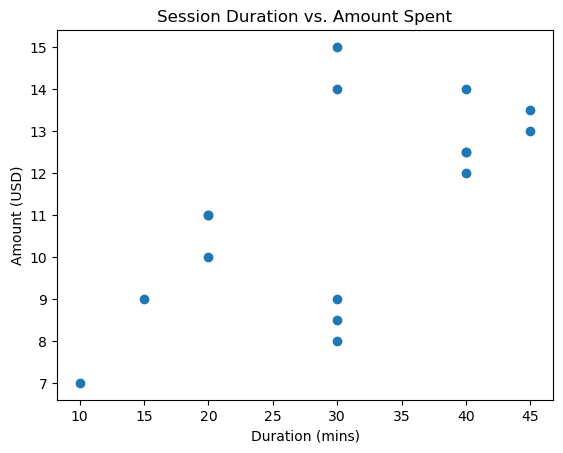

In [35]:
import matplotlib.pyplot as plt

correlation_rating = full_data['Session Rating'].corr(full_data['Rating'])
print(f"Correlation between Session Rating and Order Rating: {correlation_rating:.2f}")

correlation_duration_amount = full_data['Duration (mins)'].corr(full_data['Amount (USD)'])
print(f"Correlation between Session Duration and Amount Spent: {correlation_duration_amount:.2f}")

plt.scatter(full_data['Duration (mins)'], full_data['Amount (USD)'])
plt.title('Session Duration vs. Amount Spent')
plt.xlabel('Duration (mins)')
plt.ylabel('Amount (USD)')
plt.show()


## 1. Correlation Between Session Rating and Order Rating
* Moderate positive correlation (0.57), indicating that higher cooking session ratings are generally associated with higher order ratings.

## 2. Correlation Between Session Duration and Amount Spent
* Strong positive correlation (0.65), suggesting that longer cooking sessions are linked to higher spending on orders.

## Step 4.2: Identify Popular Dishes

Most Popular Dishes:
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: Dish Name_y, dtype: int64


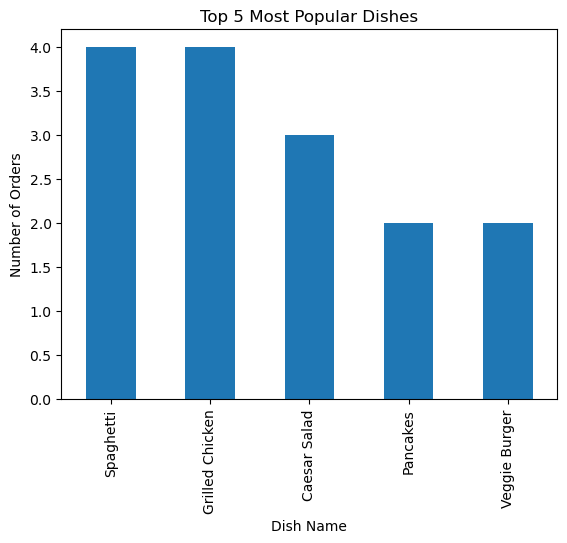

In [36]:
popular_dishes = full_data['Dish Name_y'].value_counts()

print("Most Popular Dishes:")
print(popular_dishes)

popular_dishes.head(5).plot(kind='bar')
plt.title('Top 5 Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.show()


## 1. Top Dishes
* Spaghetti and Grilled Chicken are the most popular, each with 4 orders.
* Followed by Caesar Salad (3 orders) and Pancakes/ Veggie Burger (2 orders each).

## 2. Insights
* The top dishes are a mix of meals that cater to different preferences, such as comfort food (Spaghetti) and healthy options (Grilled Chicken).

## Step 4.3: Analyze Demographic Factors

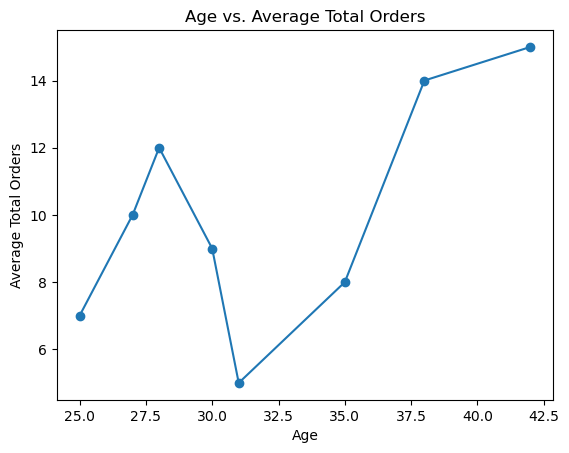

Most Preferred Meal by Location:
Location
Austin              Dinner
Boston           Breakfast
Chicago          Breakfast
Los Angeles          Lunch
Miami               Dinner
New York            Dinner
San Francisco       Dinner
Seattle              Lunch
Name: Favorite Meal, dtype: object


In [38]:
age_orders = full_data.groupby('Age')['Total Orders'].mean()

age_orders.plot(kind='line', marker='o')
plt.title('Age vs. Average Total Orders')
plt.xlabel('Age')
plt.ylabel('Average Total Orders')
plt.show()

location_meal = full_data.groupby('Location')['Favorite Meal'].apply(lambda x: x.mode()[0])

print("Most Preferred Meal by Location:")
print(location_meal)


# Visualizations

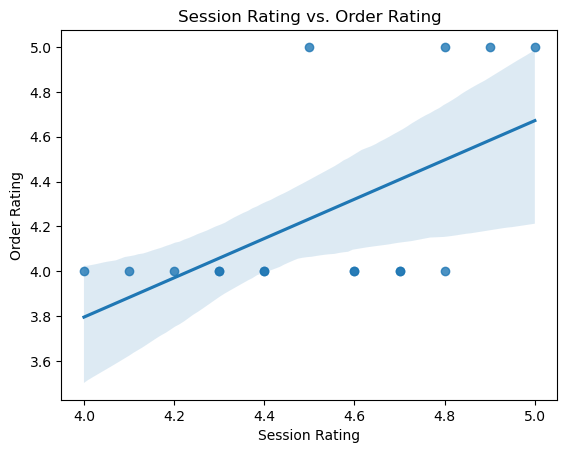

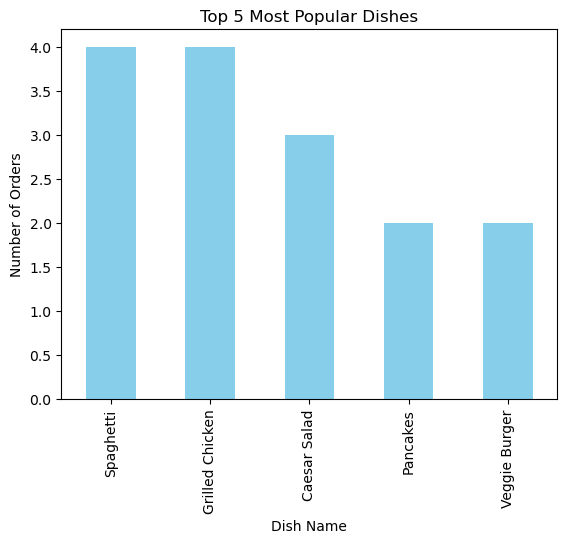

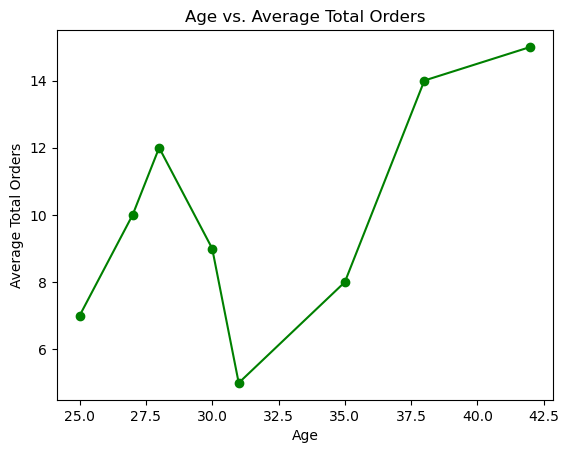

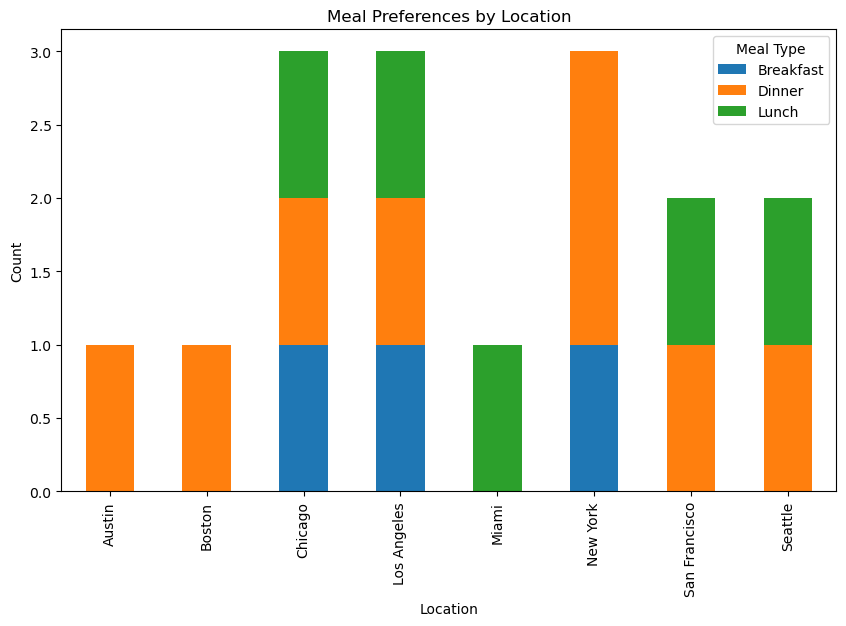

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Session Rating', y='Rating', data=full_data)
plt.title('Session Rating vs. Order Rating')
plt.xlabel('Session Rating')
plt.ylabel('Order Rating')
plt.show()

popular_dishes.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.show()

age_orders.plot(kind='line', marker='o', color='green')
plt.title('Age vs. Average Total Orders')
plt.xlabel('Age')
plt.ylabel('Average Total Orders')
plt.show()

location_meal_counts = full_data.groupby(['Location', 'Meal Type_x']).size().unstack()
location_meal_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Meal Preferences by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Meal Type')
plt.show()
